# import

0.38


In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from textblob import TextBlob as tb
import re

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [70]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [71]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
# !pip freeze > requirements.txt

# DATA

In [72]:
# DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
DATA_DIR = "./"
df_train = pd.read_csv(DATA_DIR + "main_task.csv")
df_test = pd.read_csv(DATA_DIR + "kaggle_task.csv")
sample_submission = pd.read_csv(DATA_DIR + "sample_submission.csv")

df_cities = pd.read_csv(DATA_DIR + "cities.csv")


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [74]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [76]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [77]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [78]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [79]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [80]:
#  переименуем колонки
data.rename(
    columns={
        "Cuisine Style": "cuisine",
        "Price Range": "price",
        "Number of Reviews": "reviews_count",
    },
    inplace=True,
)
data.columns = [name.lower() for name in data.columns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  50000 non-null  object 
 1   city           50000 non-null  object 
 2   cuisine        38410 non-null  object 
 3   ranking        50000 non-null  float64
 4   price          32639 non-null  object 
 5   reviews_count  46800 non-null  float64
 6   reviews        49998 non-null  object 
 7   url_ta         50000 non-null  object 
 8   id_ta          50000 non-null  object 
 9   sample         50000 non-null  int64  
 10  rating         50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Признаки:
- city: Город
- cuisine: Кухня
- ranking: Ранг ресторана относительно других ресторанов в этом городе
- price: Цены в ресторане в 3 категориях
- review_count: Количество отзывов
- reviews: 2 последних отзыва и даты этих отзывов
- url_ta: страница ресторана на www.tripadvisor.com
- id_ta: ID ресторана в TripAdvisor
- rating: Рейтинг ресторана

In [82]:
data.sample(5)

,restaurant_id,city,cuisine,ranking,price,reviews_count,reviews,url_ta,id_ta,sample,rating
45822,id_2078,Madrid,"['Mediterranean', 'European', 'Spanish', 'Vege...",2080.0,$$$$,101.0,"[['Classic in Madrid', 'A touch of class'], ['...",/Restaurant_Review-g187514-d697592-Reviews-Hev...,d697592,1,4.5
33512,id_5511,Milan,NaN,5514.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187849-d8341386-Reviews-Ba...,d8341386,1,3.0
19244,id_5784,London,"['Cafe', 'European', 'Delicatessen', 'Vegetari...",5793.0,$$ - $$$,137.0,[['Good service and good food without a fuss.'...,/Restaurant_Review-g186338-d7039205-Reviews-Za...,d7039205,1,3.5
30564,id_2193,Stockholm,NaN,2196.0,NaN,NaN,"[[], []]",/Restaurant_Review-g189852-d12861342-Reviews-S...,d12861342,1,3.0
15863,id_1575,Lisbon,NaN,1576.0,NaN,10.0,"[['One of them', ""Once in Mouraria, Flamingo's...",/Restaurant_Review-g189158-d8497127-Reviews-Fl...,d8497127,1,5.0


In [83]:
# Мы не будем парсить сам сайт, поэтому сразу удалим url_ta и id_ta
data.drop(columns=["url_ta", "id_ta"], inplace=True)

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

# 0. Вспомогательные функции

In [84]:
# статистика по пропускам
def show_misses():
    total = data.restaurant_id.count()
    print(f"{'Total':>15}: 100.0%: {total}")
    for column in data.columns:
        nan_count = len(data[data[column].isnull()][column])
        if nan_count:
            print(f"{column:>15}: {round(nan_count/total*100,1):>5}%: {nan_count}")

# сохранием информацию перед заполнением NaN
def store_nan(col):
    data[f"{col}_has_nan"] = data[col].isna()

# парсинг review
def review_format(review_string):
    def format_string(line, sep):
        line = re.sub(r",\s+nan", ", 'nan'", line)
        line = re.sub(r"nan,", "'nan',", line)
        line = re.sub(r"""^['"]""", "", line)
        line = re.sub(r"""['"]$""", "", line)
        line = re.sub(r"""['"],\s+['"]""", sep, line)
        return line

    if type(review_string) != str:
        return [[np.NaN, np.NaN], [np.NaN, np.NaN]]

    sep = "<r_separator>"
    r = re.match(r"\[\[(.*)\],\s+\[(.*)\]\]", review_string)
    review_text = format_string(r.group(1), sep).split(sep)
    review_date = format_string(r.group(2), sep).split(sep)
    review_date = [pd.to_datetime(dt) for dt in review_date]
    for indx, text in enumerate(review_text):
        if text == "nan":
            review_text[indx] = np.NaN
            review_date[indx] = np.NaN
    if len(review_text) == 1:
        review_text.append(np.NaN)
        review_date.append(np.NaN)
    return [review_text, review_date]

# гистограмма с основными показателями выбросов
def show_histogram(col, limit, bins=100):
    plt.subplots(figsize=(15, 10))
    median = data[col].median()
    iqr = data[col].quantile(0.75) - data[col].quantile(0.25)
    per25 = data[col].quantile(0.25)
    per75 = data[col].quantile(0.75)
    l_out = per25 - 1.5 * iqr
    r_out = per75 + 1.5 * iqr
    print(f"25 percentile: {per25}")
    print(f"75 percentile: {per75}")
    print(f"Outlier left: {l_out}")
    print(f"Outlier left count: {len(data[data[col]<l_out])}")
    print(f"Outlier right: {r_out}")
    print(f"Outlier right count: {len(data[data[col]>r_out])}")

    data[col].loc[data[col].between(per25 - 1.5 * iqr, per75 + 1.5 * iqr)].hist(
        bins=bins, range=(0, limit), label="Values",
    )
    data[col].loc[data[col] > r_out].hist(
        alpha=0.5, bins=bins, range=(0, limit), label="Right Outliers"
    )
    data[col].loc[data[col] < l_out].hist(
        alpha=0.5, bins=bins, range=(0, limit), label="Left Outliers"
    )    
    plt.legend()

## 1. Обработка NAN
посмотрим на число пропусков и их распределение

In [85]:
show_misses()

          Total: 100.0%: 50000
        cuisine:  23.2%: 11590
          price:  34.7%: 17361
  reviews_count:   6.4%: 3200
        reviews:   0.0%: 2


(<Figure size 864x504 with 1 Axes>, <AxesSubplot:>)

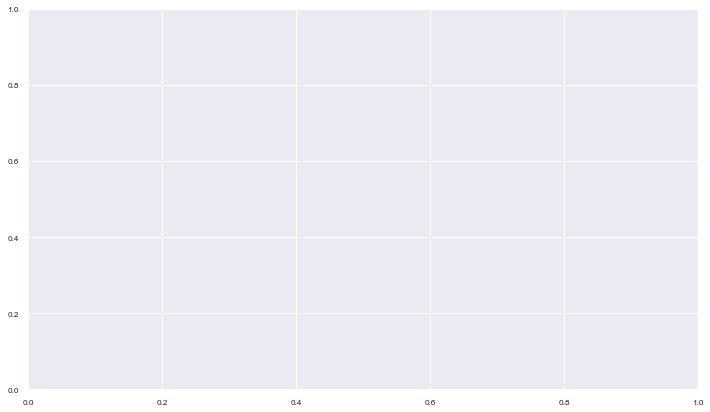

In [86]:
plt.subplots(figsize=(12, 7))
# sns.heatmap(data.isnull())

In [87]:
# Почистим дубликаты, если есть
data.duplicated(keep=False).sum()

0

### 2. Обработка review 

In [88]:
# в колонке reviews много пустых записей в виде пстого списка
len(data[data.reviews=="[[], []]"])

8112

In [89]:
# заменим их на nan
data.reviews = data.reviews.replace("[[], []]", np.NaN)

In [90]:
# и посмотрим на пропуси теперь
show_misses()

          Total: 100.0%: 50000
        cuisine:  23.2%: 11590
          price:  34.7%: 17361
  reviews_count:   6.4%: 3200
        reviews:  16.2%: 8114


In [91]:
# форматируем reviews, на выходе список списков вида [[отзыв1, отзыв2], [дата1, дата2]]
data["reviews_formatted"] = data.reviews.apply(review_format)

In [92]:
# лист с текстами и лист в датами в отдельные временные столбцы
data[['reviews_text_tmp','reviews_date_tmp']] = pd.DataFrame(data.reviews_formatted.tolist(), index= data.index)

# временные столбцы разбиваем еще раз, каждому отзыву/дате свой стобец
data[['review_1_text','review_2_text']] = pd.DataFrame(data.reviews_text_tmp.to_list(), index= data.index)
data[['review_1_date','review_2_date']] = pd.DataFrame(data.reviews_date_tmp.to_list(), index= data.index)

# удаляем временны столбцы
data.drop(columns=['reviews_text_tmp', 'reviews_date_tmp'], inplace=True)

In [93]:
# перед заполнением nan сохраним информацию где были пропуски
store_nan("review_1_text")
store_nan("review_2_text")
store_nan("review_1_date")
store_nan("review_2_date")

In [94]:
# для определения тональности нужен текст, меняем NaN на ""
data.review_1_text.replace(np.NaN, "", inplace=True)
data.review_2_text.replace(np.NaN, "", inplace=True)

# и делаем еще два столбца с тональностями по каждому из ответов
data["review_1_polarity"] = data.review_1_text.apply(lambda x: tb(x).sentiment.polarity).round(2)
data["review_2_polarity"] = data.review_2_text.apply(lambda x: tb(x).sentiment.polarity).round(2)

In [95]:
# формируем временные df с тональностями, отфильтровывая те записи, где отзыва не было
df_polarity_1 = data[data.review_1_text_has_nan==False][["city", "review_1_polarity"]]
df_polarity_2 = data[data.review_2_text_has_nan==False][["city", "review_2_polarity"]]

# меняем имя столбцов
df_polarity_1.columns = ["city", "polarity"]
df_polarity_2.columns = ["city", "polarity"]

# и объединяем оба df в один, что бы вычислить медиану по каждому городу
df_polarity = pd.concat([df_polarity_1, df_polarity_2], ignore_index=True)
median_polarity = df_polarity.groupby("city")["polarity"].median().to_dict()

In [96]:
# восстанавливаем NaN там, где отзывов изначально не было.
data.loc[data.review_1_text_has_nan==True, "review_1_text"] = np.NaN
data.loc[data.review_2_text_has_nan==True, "review_2_text"] = np.NaN

# полярность на "" равна 0, поэтому их тоже меняем на NaN и будем заполнять вышенайденной медианов
data.loc[data.review_1_text_has_nan==True, "review_1_polarity"] = np.NaN
data.loc[data.review_2_text_has_nan==True, "review_2_polarity"] = np.NaN

In [97]:
# заполняем NaN медианным значением по каждому городу
data.review_1_polarity.fillna(data.city.map(median_polarity), inplace=True)
data.review_2_polarity.fillna(data.city.map(median_polarity), inplace=True)

## 3. Обработка city 

In [98]:
# список городов
data.city.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: city, dtype: int64

Text(0, 0.5, 'Город')

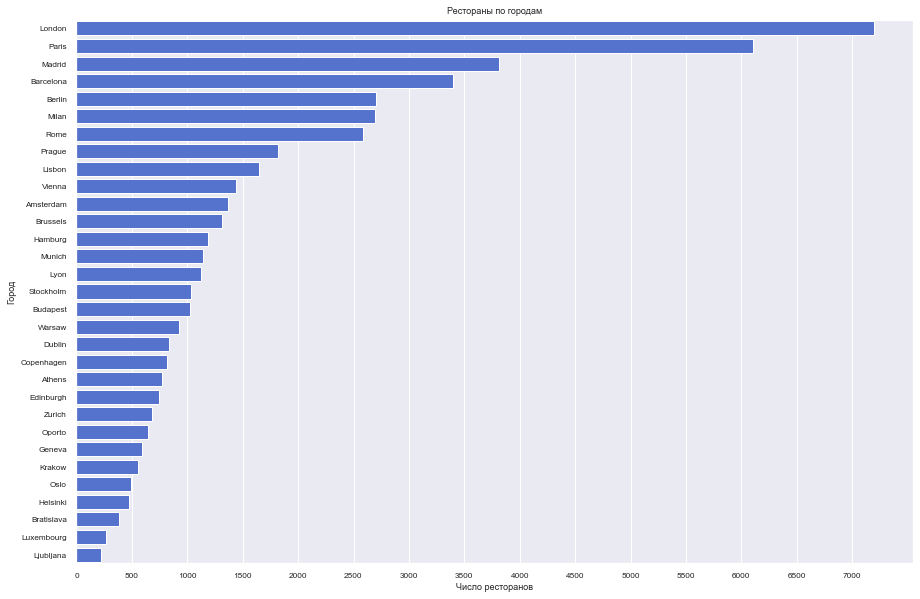

In [99]:
# посмотрим на распределение ресторанов по городам
plt.subplots(figsize=(15, 10))
plt.xticks(ticks=range(0, 7500, 500))
plt.title("Рестораны по городам")
sns.countplot(y="city", data=data, order=data.city.value_counts().index, color="royalblue")
plt.xlabel("Число ресторанов")
plt.ylabel("Город")

In [100]:
# добавим столбцы для городов
# - population - численность населения
# - density - плотность населения
# - capital - является ли столицей
# - purchasing_power_index - индекс покупательской способности

data = data.reset_index().merge(df_cities, how="left").set_index("index")


In [101]:
data.head()

,restaurant_id,city,cuisine,ranking,price,reviews_count,reviews,sample,rating,reviews_formatted,...,review_1_text_has_nan,review_2_text_has_nan,review_1_date_has_nan,review_2_date_has_nan,review_1_polarity,review_2_polarity,population,density,capital,purchasing_power_index
index,,,,,,,,,,,,,,,,,,,,,
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,NaN,0,0.0,"[[nan, nan], [nan, nan]]",...,True,True,True,True,0.40,0.40,2148,20781,True,73.25
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",0,0.0,"[[Very good reviews!, Fine dining in Hakaniemi...",...,False,False,False,False,1.00,0.42,656,3071,True,73.74
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",0,0.0,"[[Better than the Links, Ivy Black], [2017-12-...",...,False,False,False,False,0.50,-0.17,488,4140,True,73.06
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",0,0.0,"[[Most exquisite, Delicious and authentic], [2...",...,False,False,False,False,0.75,0.75,8961,5667,True,80.94
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",0,0.0,"[[Always the best in bratislava, Very good but...",...,False,False,False,False,1.00,0.91,437,1189,True,53.87


## 4. Обработка price 

In [102]:
# возможные значения
data.price.unique().tolist()

['$$ - $$$', '$$$$', '$', nan]

In [103]:
# заменим значения на 1,2,3,nan
def price_to_int(price):
    if price == '$':
        return 1
    elif price == '$$ - $$$':
        return 2
    elif price == '$$$$':
        return 3
    else:
        return np.nan

data.price = data.price.apply(price_to_int)

In [104]:
# посмотрим медиану по городам
data.groupby("city")["price"].median().unique().tolist()

[2.0]

In [105]:
# везде медиана одинаковая, поэтому сохраняем строки, где были пропуски и заполняем медианой
store_nan("price")
data.price.fillna(data.price.median(), inplace=True)

## 5. Обработка reviews_count 

In [106]:
# большой разброс значений
data.reviews_count.describe()

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: reviews_count, dtype: float64

25 percentile: 9.0
75 percentile: 115.0
Outlier left: -150.0
Outlier left count: 0
Outlier right: 274.0
Outlier right count: 5428


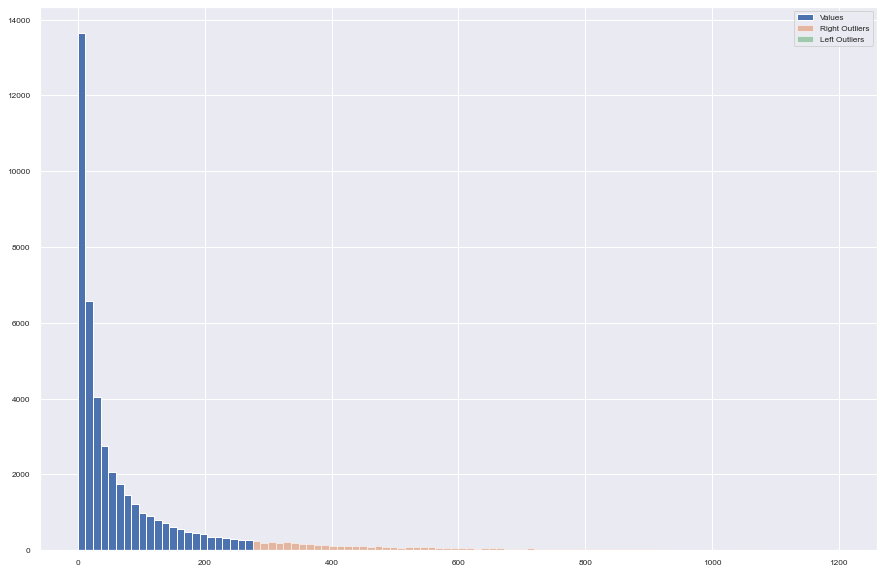

In [107]:
# посмотрим на гистограмме
show_histogram('reviews_count', 1200)

можно попробовать логарифмировать или привязать к численности города

25 percentile: 2.302585092994046
75 percentile: 4.7535901911063645
Outlier left: -1.373922554174432
Outlier left count: 0
Outlier right: 8.430097838274843
Outlier right count: 21


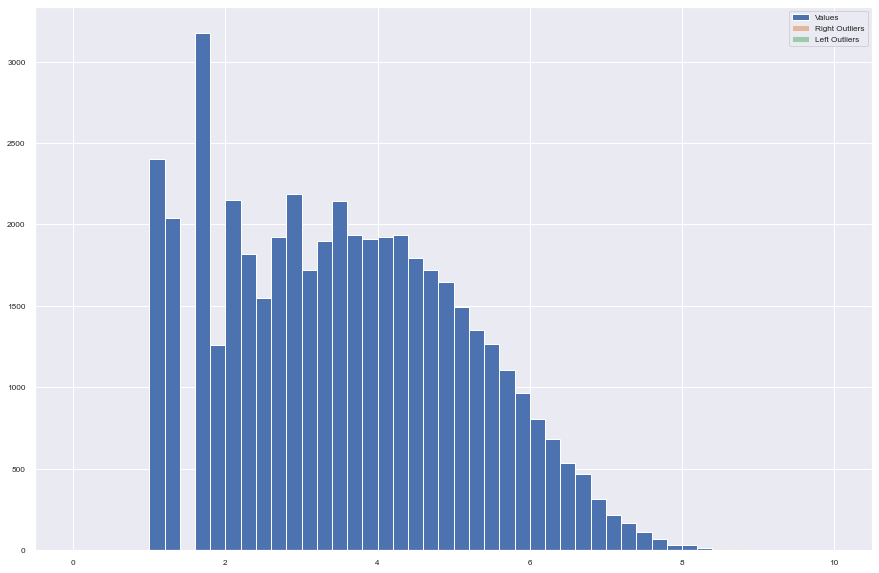

In [108]:
# логорифмируем
data["reviews_count_log"] = np.log(data.reviews_count + 1)
show_histogram("reviews_count_log", 10, bins=50)

выглядит лучше, теперь сделаем привязку к численности города

25 percentile: 0.004807692307692308
75 percentile: 0.07326889251919393
Outlier left: -0.09788410800956013
Outlier left count: 0
Outlier right: 0.17596069283644636
Outlier right count: 6148


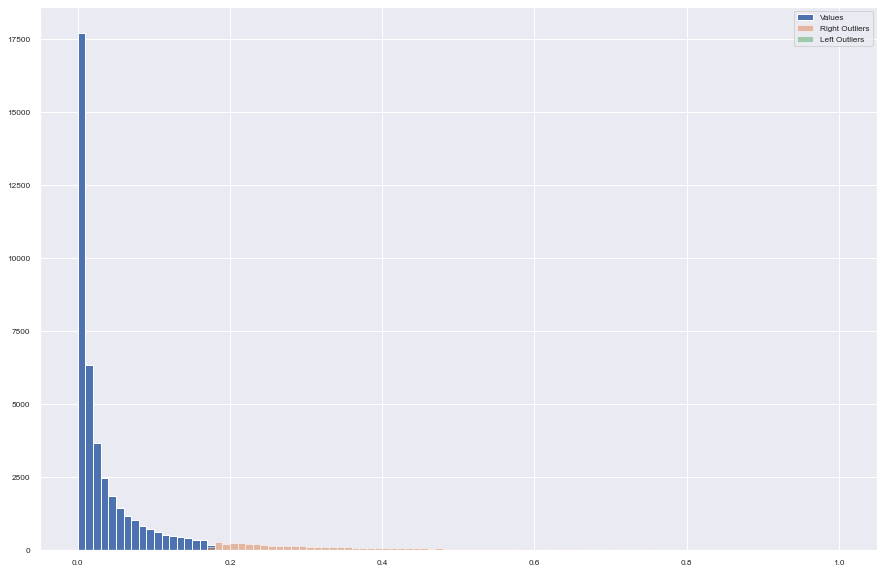

In [109]:
data["reviews_count_pop"] = data.reviews_count / data.population
show_histogram("reviews_count_pop", 1)

судя по количеству выбросов, стало хуже. Оставляем логорифмированные значения. Посмотрим boxplot еще:

In [110]:
# удаляем reviews_count_pop
data.drop(columns=["reviews_count_pop"], inplace=True)

<AxesSubplot:xlabel='reviews_count_log'>

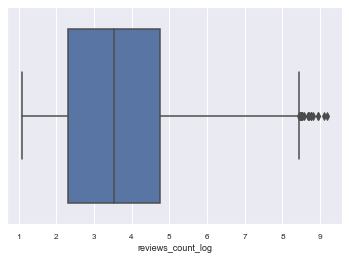

In [111]:
sns.boxplot(x="reviews_count_log", data=data)

заменим выбросы и пропуски медианными значениями

In [112]:
per75 = data.reviews_count_log.quantile(0.75)
per25 = data.reviews_count_log.quantile(0.25)
iqr = per75 - per25
r_out = per75 + 1.5 * iqr

# сохраним информацию о том, где были выбросы
data['reviews_count_log_outliers'] = data.reviews_count_log >= r_out
# сохраним информацию о том, где были пропуски
store_nan("reviews_count_log")

# сбрасываем выбросы в NaN, что бы потом заполнить медианой
data.loc[data.reviews_count_log>=r_out, "reviews_count_log"] = np.NaN

# вычисляем медиану числа отзывов для каждого города
median_reviews_count_log = data[data.reviews_count_log.notnull()].groupby("city")["reviews_count_log"].median().to_dict()

# заполняем пропуски медианой
data.reviews_count_log.fillna(data.city.map(median_reviews_count_log), inplace=True)

## 6. Обработка cuisine

In [116]:
# заполним пропуски "unknown"
data.cuisine.fillna("['unknown']", inplace=True)

# конвертируем в list
data.cuisine = data.cuisine.apply(lambda x: eval(x))

# добавим столбец числа кухонь
data['cuisine_count'] = data.cuisine.apply(lambda x: len(x))

In [125]:
(data.review_1_date - data.review_2_date).sort_values(ascending=False)

index
1966    3296 days
17990   3207 days
20997   3137 days
49997   3127 days
18356   3096 days
           ...   
49986         NaT
49988         NaT
49989         NaT
49991         NaT
49994         NaT
Length: 50000, dtype: timedelta64[ns]

In [46]:
# помотрим еще на наличие пропусков
show_misses()

          Total: 100.0%: 50000
  reviews_count:   6.4%: 3200
        reviews:  16.2%: 8114
  review_1_text:  16.2%: 8115
  review_2_text:  27.6%: 13795
  review_1_date:  16.2%: 8115
  review_2_date:  27.6%: 13795


## 7. Обработка ranking

25 percentile: 972.0
75 percentile: 5241.0
Outlier left: -5431.5
Outlier left count: 0
Outlier right: 11644.5
Outlier right count: 3075


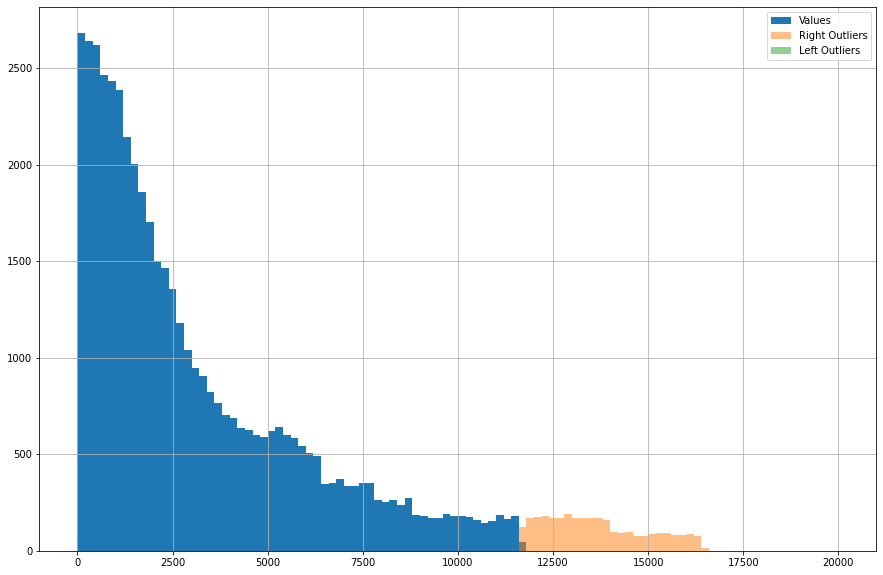

In [47]:
# Посмотрим распредение ресторанов по рангу
show_histogram("ranking", 20000)

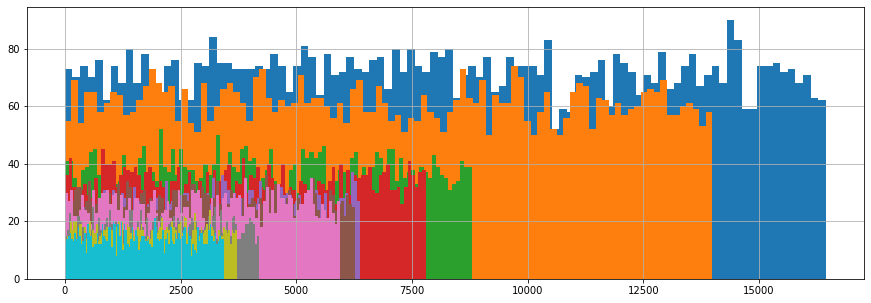

In [48]:
# посмотрим на данные по ranking топ 10-ти городов
for x in (data.city.value_counts())[0:10].index:
    data.ranking[data.city == x].hist(bins=100, figsize=(15,5))

В больших городах больше ресторанов, значит Ranking у некоторых может быть очень высокий. Нужно нормировать значения по городам.

In [49]:
data["ranking_norm"] = data.groupby("city").ranking.apply(lambda x: x/x.max())

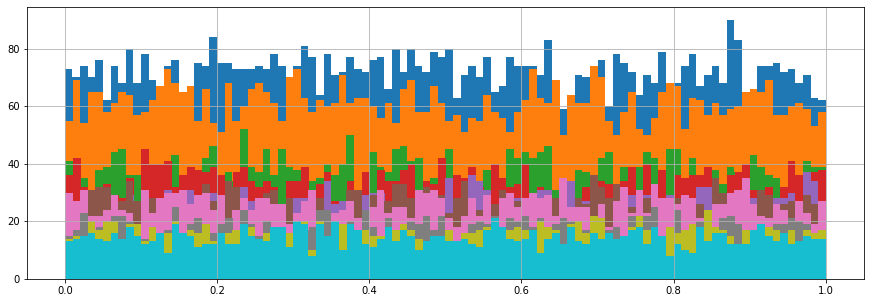

In [50]:
# снова смотрим гистограмму
for x in (data.city.value_counts())[0:10].index:
    data.ranking_norm[data.city == x].hist(bins=100, figsize=(15,5))


# Feature Engineering

In [51]:
# dummy-признаки городов
dummy_city = pd.get_dummies(data.city)
data = pd.concat([data, dummy_city], axis=1)

In [52]:
# отношение относительного ранга к населению
data['ranking_to_population'] = data.ranking / data.population * 1000

# отношение населения к число отзывов
data['population_to_reviews_count'] = data.population / data.reviews_count_log

In [53]:
# удаляем обработанные или ненужные стобцы
data = data.drop(
    [
        "city",
        "restaurant_id",
        "reviews",
        "reviews_count",
        "reviews_formatted",
        "cuisine",
        "review_1_text",
        "review_2_text",
        "review_1_text_has_nan",
        "review_2_text_has_nan",
        "review_1_date",
        "review_2_date",
        "review_1_date_has_nan", 
        "review_2_date_has_nan",
        "price_has_nan",
    ], 
    axis = 1,
)


<AxesSubplot:>

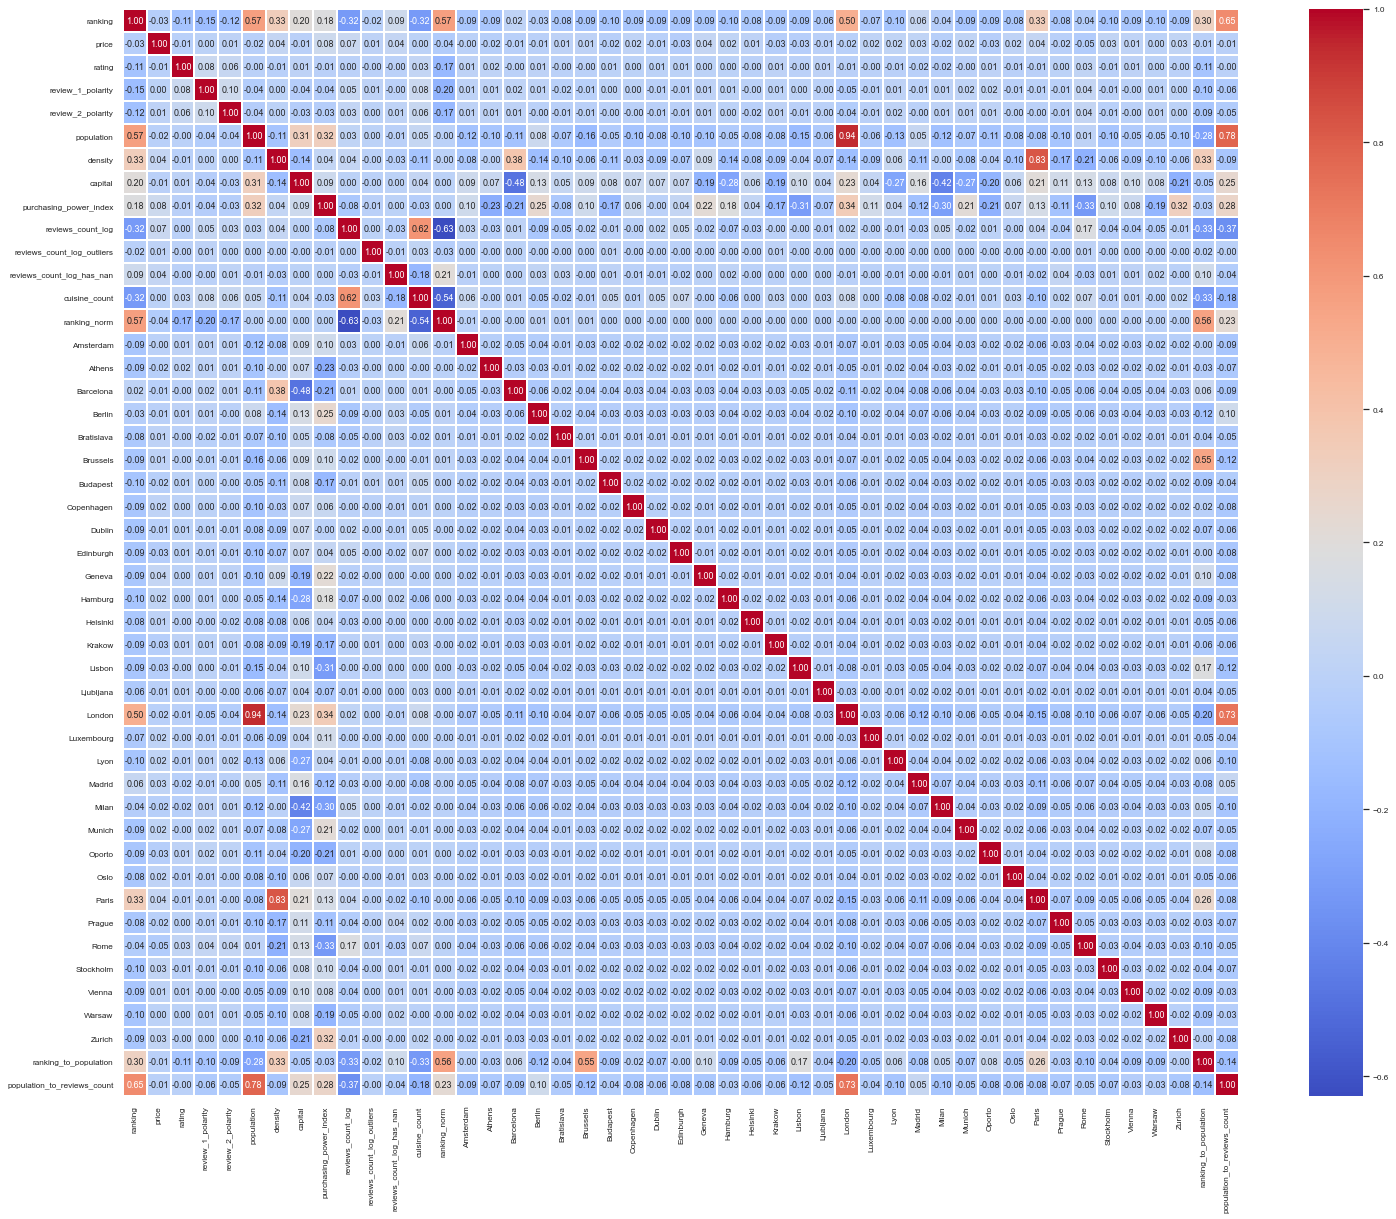

In [54]:
# тепловая карта корреляции признаков

sns.set(font_scale=0.75)
plt.subplots(figsize=(25, 20))
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, fmt='.2f', linewidths=0.1, cmap="coolwarm")

Наибольшая корреляця с целевой переменной у ranking_log (оно и понятно), но все равно связь очень низкая. Поэтому оставляем все признаки.

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# Обучение модели¶

In [55]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [56]:
# выделим датасет для обучения
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values              # наш таргет
X = train_data.drop(['rating'], axis=1)

# разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 47), (40000, 47), (40000, 46), (32000, 46), (8000, 46))

In [57]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [58]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [59]:
# округляем до 0.5 полученные значения
y_pred = (y_pred * 2).round()/2
y_pred

array([4.5, 5. , 4. , ..., 4.5, 4. , 4. ])

In [60]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.17425


<AxesSubplot:>

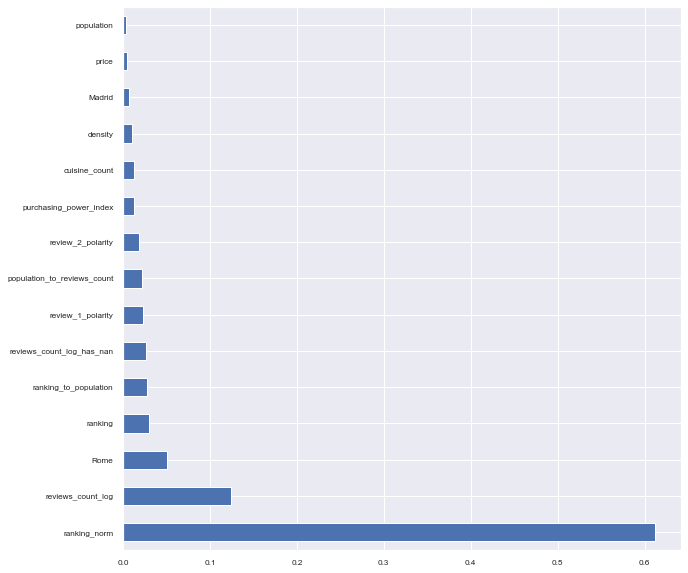

In [61]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [62]:
test_data

,ranking,price,rating,review_1_polarity,review_2_polarity,population,density,capital,purchasing_power_index,reviews_count_log,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,ranking_to_population,population_to_reviews_count
index,,,,,,,,,,,,,,,,,,,,,
0,12963.0,2.0,0.0,0.40,0.40,2148,20781,True,73.25,1.609438,...,0,1,0,0,0,0,0,0,6034.916201,1334.627439
1,106.0,2.0,0.0,1.00,0.42,656,3071,True,73.74,4.584967,...,0,0,0,0,0,0,0,0,161.585366,143.076260
2,810.0,2.0,0.0,0.50,-0.17,488,4140,True,73.06,3.367296,...,0,0,0,0,0,0,0,0,1659.836066,144.923412
3,1669.0,3.0,0.0,0.75,0.75,8961,5667,True,80.94,5.313206,...,0,0,0,0,0,0,0,0,186.251534,1686.552344
4,37.0,3.0,0.0,1.00,0.91,437,1189,True,53.87,5.093750,...,0,0,0,0,0,0,0,0,84.668192,85.791408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4367.0,1.0,0.0,0.17,0.70,8961,5667,True,80.94,3.367296,...,0,0,0,0,0,0,0,0,487.334003,2661.185845
9996,2612.0,2.0,0.0,0.50,0.40,505,6452,True,40.49,1.098612,...,0,0,0,0,0,0,0,0,5172.277228,459.670809
9997,5562.0,2.0,0.0,0.42,0.42,1378,7588,False,47.52,1.098612,...,0,0,0,0,0,0,0,0,4036.284470,1254.309654


In [63]:
test_data = test_data.drop(['rating'], axis=1)

In [64]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [65]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [66]:
predict_submission = (predict_submission * 2).round()/2
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4.5])

In [67]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.0
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
